#  MIE 479 Capstone - Problem Definition

Lenders want to lend. Where do lenders get the money to lend you money for a house? In Canada, banks use a mix of deposits, government-sponsored mortgage-backed securities (MBS), private-label MBS and covered bonds (i.e. bonds issued by the bank that offer recourse to the underlying loans and the issuer).

However, not all lenders are banks. A third-party lender is a financial institution or entity that provides loans or credit to borrowers but is not the direct source of the funds used for those loans. Instead of using its capital, a third-party lender often relies on funding from other institutions, such as banks, to provide the loans. These lenders act as intermediaries, originating loans for various purposes, including mortgages, auto loans, or personal loans. They may later sell or transfer the loans to investors or other financial institutions.


### What is a Bank Structured Finance Warehouse Facility?
A bank-structured finance warehouse facility, also known as a warehouse line of credit, is a financial arrangement provided by a bank or financial institution to third-party lenders. It allows the third-party lenders to fund their loan originations up to the warehouse limit.

#### How the Process Typically Works

1. Third-party lenders (some examples include residential mortgages, auto finance, equipment finance, credit card advances, personal loans, and unsecured credit facilities) originate loans from borrowers.

2. Instead of using their capital to fund these loans, lenders utilize a warehouse line of credit from a bank.

3. The bank provides a revolving line of credit to the lender (based upon eligibility criteria and an advance rate), secured by the loans to be funded as collateral.

4. The lender uses the funds from the bank's warehouse facility to cover the costs of originating and funding the loans.

5. Once the lender has a sufficient pool of loans, it usually bundles them together and sells them to investors.

6. The proceeds from the loan sales are used to repay the bank's warehouse line of credit.

7. The cycle repeats as the lender continues to originate and sell loans, replenishing the warehouse facility.

#### Bank Structured Finance Warehouse Facilities Offer Several Advantages to Third-Party Lenders:

- **Accessible short-term funding**: Lenders can access funds quickly via the line of credit to originate loans without tying up their own capital.
  
- **Scalability**: The size of the warehouse facility can vary based on the lender's needs, allowing for flexibility in loan origination volume.
  
- **Cost-effective**: Warehouse lines of credit usually offer lower interest rates than other short-term borrowing options.
  
- **Liquidity**: By providing access to capital, warehouse facilities ensure lenders have the necessary liquidity to meet their loan funding requirements.

It's important to note that the specific terms and conditions of a bank structured finance warehouse facility can vary based on the agreement between the lender and the bank. Lenders need to meet certain eligibility criteria and maintain compliance with industry regulations to access these facilities.

Source - https://www.taosolutions.ca/Bank-Structured-Finance-Warehouse-Facilities

#### The third-party lender's problem

Each week, the lender originates loans. During this time, the loans are held on their balance sheet. They wish to take these loans off their balance sheets using their lending facilities. The lender wishes to fund assets using the facilities. Here are some considerations:
- Each loan can only be assigned to one facility
- Each facility has some overall principal balance limit (the warehouse limit)
- Each facility has its own set of conditions that must be obeyed by any loans funded by the facility. For example,
    * The balanced weighted average credit score of the loans in the pool must be above 500
    * The % of loans with loan-to-value (LTV) > 90% must be less than 30%
    * First Time Home Buyer Loans must be greater than 10% of the loans in the facility
    * The % of loans with at least two borrowers must exceed 60%
    * etc

The facility may already have existing loans secured. These loans also count in the conditions mentioned above. The lender aims to find the allocation of week's $N$ loans to a set of $M$ facilities such that the resulting number of loans funded is maximized. It may be the case that there are many allocations to the facilities that maximize the number of loans funded. In this case, there are other considerations that can be made. For example, for each facility, how well do the cashflows obtained from the underlying mortgage pool match the interest payments required by the facilities? How diversified is the allocation among all the facilities? Is there a preference for optimal allocations that fill fewer facilities?

The goal of this project is to develop a tool that accepts:
* a set of loans
* data describing the facilities and their conditions

and outputs the loan facility assignments.

To get started, the remainder of this notebook looks at mortgage originations by Fannie Mae from Q1 2024. This dataset can be used to develop and test your proposed tool. The tool will be judged based on its algorithmic effectiveness and ease of use.



# Fannie Mae Mortgage Lending Data

From wikipedia:

"The Federal National Mortgage Association (FNMA), commonly known as Fannie Mae, is a United States government-sponsored enterprise (GSE) and, since 1968, a publicly traded company. Founded in 1938 during the Great Depression as part of the New Deal,[2] the corporation's purpose is to expand the secondary mortgage market by securitizing mortgage loans in the form of mortgage-backed securities (MBS),[3] allowing lenders to reinvest their assets into more lending and in effect increasing the number of lenders in the mortgage market by reducing the reliance on locally based savings and loan associations (or "thrifts").[4] Its brother organization is the Federal Home Loan Mortgage Corporation (FHLMC), better known as Freddie Mac.

In 2024, with over $4.3 trillion in assets, Fannie Mae is the largest company in the United States and the fifth largest company in the world, by assets.[5][6] Fannie Mae was ranked number 27 on the Fortune 500 rankings of the largest United States corporations by total revenue and was ranked number 58 on the Fortune Global 500 rankings of the largest global corporations by total revenue.[5][6] In terms of profit, Fannie Mae is the 15th most profitable company in the United States and the 33rd most profitable in the world.[5][6]"

references:

2.  Pickert, Kate (July 14, 2008). "A Brief History of Fannie Mae and Freddie Mac". Time. Archived from the original on October 6, 2008.

3.  "About Fannie Mae". Fendral National Mortgage Association. October 7, 2008. Archived from the original on October 26, 2008. Retrieved October 28, 2008.
4.  Fabozzi, Frank J.; Modigliani, Franco (1992), Mortgage and Mortgage-backed Securities Markets, Harvard Business School Press, p. 2, ISBN 0-87584-322-0
5.  "Fortune Global 500". Fortune. Retrieved August 5, 2024.
6.  "Fortune 500". Fortune. Retrieved August 5, 2024


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
import pandas as pd
import os
import numpy as np
### Define the column names and column data types (classes)
lppub_column_names = ["POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                      "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                      "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                      "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                      "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                      "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                      "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                      "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                      "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                      "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                      "DISPOSITION_DATE", "FORECLOSURE_COSTS", "PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                      "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                      "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                      "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                      "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                      "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                      "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                      "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                      "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                      "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                      "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                      "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                      "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                      "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                      "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                      "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                      "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                      "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                      "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                      "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB",
                      "PAYMENT_DEFERRAL_MOD_EVENT_FLAG", "INTEREST_BEARING_UPB"]

# Updating column classes, converting integers to 'float' where NaN is expected
lppub_column_classes = {"POOL_ID": str, "LOAN_ID": str, "ACT_PERIOD": str, "CHANNEL": str, "SELLER": str, "SERVICER": str,
                        "MASTER_SERVICER": str, "ORIG_RATE": float, "CURR_RATE": float, "ORIG_UPB": float, "ISSUANCE_UPB": float,
                        "CURRENT_UPB": float, "ORIG_TERM": "Int64", "ORIG_DATE": str, "FIRST_PAY": str, "LOAN_AGE": "Int64",
                        "REM_MONTHS": "Int64", "ADJ_REM_MONTHS": "Int64", "MATR_DT": str, "OLTV": float, "OCLTV": float,
                        "NUM_BO": "Int64", "DTI": float, "CSCORE_B": "Int64", "CSCORE_C": "Int64", "FIRST_FLAG": str, "PURPOSE": str,
                        "PROP": str, "NO_UNITS": "Int64", "OCC_STAT": str, "STATE": str, "MSA": str, "ZIP": str, "MI_PCT": float,
                        "PRODUCT": str, "PPMT_FLG": str, "IO": str, "FIRST_PAY_IO": str, "MNTHS_TO_AMTZ_IO": "Int64",
                        "DLQ_STATUS": str, "PMT_HISTORY": str, "MOD_FLAG": str, "MI_CANCEL_FLAG": str, "Zero_Bal_Code": str,
                        "ZB_DTE": str, "LAST_UPB": float, "RPRCH_DTE": str, "CURR_SCHD_PRNCPL": float, "TOT_SCHD_PRNCPL": float,
                        "UNSCHD_PRNCPL_CURR": float, "LAST_PAID_INSTALLMENT_DATE": str, "FORECLOSURE_DATE": str,
                        "DISPOSITION_DATE": str, "FORECLOSURE_COSTS": float, "PROPERTY_PRESERVATION_AND_REPAIR_COSTS": float,
                        "ASSET_RECOVERY_COSTS": float, "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS": float,
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY": float, "NET_SALES_PROCEEDS": float,
                        "CREDIT_ENHANCEMENT_PROCEEDS": float, "REPURCHASES_MAKE_WHOLE_PROCEEDS": float,
                        "OTHER_FORECLOSURE_PROCEEDS": float, "NON_INTEREST_BEARING_UPB": float, "PRINCIPAL_FORGIVENESS_AMOUNT": float,
                        "ORIGINAL_LIST_START_DATE": str, "ORIGINAL_LIST_PRICE": float, "CURRENT_LIST_START_DATE": str,
                        "CURRENT_LIST_PRICE": float, "ISSUE_SCOREB": "Int64", "ISSUE_SCOREC": "Int64", "CURR_SCOREB": "Int64",
                        "CURR_SCOREC": "Int64", "MI_TYPE": str, "SERV_IND": str, "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT": float,
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT": float, "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS": float,
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS": float, "HOMEREADY_PROGRAM_INDICATOR": str,
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT": float, "RELOCATION_MORTGAGE_INDICATOR": str,
                        "ZERO_BALANCE_CODE_CHANGE_DATE": str, "LOAN_HOLDBACK_INDICATOR": str, "LOAN_HOLDBACK_EFFECTIVE_DATE": str,
                        "DELINQUENT_ACCRUED_INTEREST": float, "PROPERTY_INSPECTION_WAIVER_INDICATOR": str,
                        "HIGH_BALANCE_LOAN_INDICATOR": str, "ARM_5_YR_INDICATOR": str, "ARM_PRODUCT_TYPE": str,
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET": "Int64", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET": "Int64",
                        "INTEREST_RATE_CHANGE_DATE": str, "PAYMENT_CHANGE_DATE": str, "ARM_INDEX": str,
                        "ARM_CAP_STRUCTURE": str, "INITIAL_INTEREST_RATE_CAP": float, "PERIODIC_INTEREST_RATE_CAP": float,
                        "LIFETIME_INTEREST_RATE_CAP": float, "MARGIN": float, "BALLOON_INDICATOR": str,
                        "PLAN_NUMBER": str, "FORBEARANCE_INDICATOR": str, "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR": str,
                        "DEAL_NAME": str, "RE_PROCS_FLAG": str, "ADR_TYPE": str, "ADR_COUNT": "Int64", "ADR_UPB": float,
                        "PAYMENT_DEFERRAL_MOD_EVENT_FLAG": str, "INTEREST_BEARING_UPB": float}

### Function to load the Loan Performance file
def load_lppub_file(filename, col_names, col_classes):
    return pd.read_csv(filename, delimiter='|', names=col_names, dtype=col_classes)

### Define the starting and ending files
starting_file = 96  # Starts at 2024Q1
ending_file = 96   # Ends at 2024Q1

### Sequentially read in and combine the files into one DataFrame
lppub_file = pd.DataFrame()  # Initialize an empty DataFrame to store all data


### Sequentially read in and combine the files into one DataFrame
lppub_file = pd.DataFrame()  # Initialize an empty DataFrame to store all data

for file_number in range(starting_file, ending_file + 1):
    # Set up file names
    file_year = file_number // 4
    file_year = f'{file_year:02}'
    file_year = f'20{file_year}'
    file_qtr = (file_number % 4) + 1
    file_qtr = f'Q{file_qtr}'
    file_name = os.path.join('..', 'data',  f'{file_year}{file_qtr}.csv')


    # Load the file and append it to the DataFrame
    file_data = load_lppub_file(file_name, lppub_column_names, lppub_column_classes)
    
    if lppub_file.empty:
        lppub_file = file_data
    else:
        lppub_file = pd.concat([lppub_file, file_data], ignore_index=True)

# The resulting DataFrame is `lppub_files` containing all the combined data



'''
for file_number in range(starting_file, ending_file + 1):
    # Set up file names
    file_year = file_number // 4
    file_year = f'{file_year:02}'
    file_year = f'20{file_year}'
    file_qtr = (file_number % 4) + 1
    file_qtr = f'Q{file_qtr}'
    file_name = os.path.join('..', 'data',  f'{file_year}{file_qtr}.csv')

    file_name = '/content/drive/My Drive/Colab Notebooks/Loans/2024Q1.csv'

    # Load the file and append it to the DataFrame
    file_data = load_lppub_file(file_name, lppub_column_names, lppub_column_classes)

    if lppub_file.empty:
        lppub_file = file_data
    else:
        lppub_file = pd.concat([lppub_file, file_data], ignore_index=True)
        '''

# The resulting DataFrame is `lppub_files` containing all the combined data



"\nfor file_number in range(starting_file, ending_file + 1):\n    # Set up file names\n    file_year = file_number // 4\n    file_year = f'{file_year:02}'\n    file_year = f'20{file_year}'\n    file_qtr = (file_number % 4) + 1\n    file_qtr = f'Q{file_qtr}'\n    file_name = os.path.join('..', 'data',  f'{file_year}{file_qtr}.csv')\n\n    file_name = '/content/drive/My Drive/Colab Notebooks/Loans/2024Q1.csv'\n\n    # Load the file and append it to the DataFrame\n    file_data = load_lppub_file(file_name, lppub_column_names, lppub_column_classes)\n\n    if lppub_file.empty:\n        lppub_file = file_data\n    else:\n        lppub_file = pd.concat([lppub_file, file_data], ignore_index=True)\n        "

In [7]:
lppub_file

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,...,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB,PAYMENT_DEFERRAL_MOD_EVENT_FLAG,INTEREST_BEARING_UPB
0,NaN,000137581448,012024,R,Other,Other,NaN,6.990,6.990,450000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
1,NaN,000137581448,022024,R,Other,Other,NaN,6.990,6.990,450000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
2,NaN,000137581448,032024,R,Other,Other,NaN,6.990,6.990,450000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
3,NaN,000137581449,012024,R,"Pulte Mortgage, L.L.C.",Other,NaN,5.990,5.990,527000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
4,NaN,000137581449,022024,R,"Pulte Mortgage, L.L.C.",Other,NaN,5.990,5.990,527000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376442,NaN,000138004118,032024,B,"United Wholesale Mortgage, LLC","United Wholesale Mortgage, LLC",NaN,6.625,6.625,615000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
376443,NaN,000138004119,032024,R,Other,Other,NaN,6.125,6.125,235000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
376444,NaN,000138004120,032024,R,Other,Other,NaN,6.750,6.750,373000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
376445,NaN,000138004121,032024,C,NewRez LLC,New Residential Mortgage LLC,NaN,7.490,7.490,114000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN


In [8]:

# Ensure interest rate columns are treated as numeric
lppub_file['ORIG_RATE'] = pd.to_numeric(lppub_file['ORIG_RATE'], errors='coerce')
lppub_file['CURR_RATE'] = pd.to_numeric(lppub_file['CURR_RATE'], errors='coerce')

# Select and rename key columns for statistical summary analysis
lppub_base = lppub_file[[
    'LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'SERVICER', 'ORIG_RATE', 'CURR_RATE',
    'ORIG_UPB', 'CURRENT_UPB', 'ORIG_TERM', 'ORIG_DATE', 'FIRST_PAY', 'LOAN_AGE', 'REM_MONTHS',
    'ADJ_REM_MONTHS', 'MATR_DT', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C',
    'FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT', 'STATE', 'MSA', 'ZIP', 'MI_PCT',
    'PRODUCT', 'DLQ_STATUS', 'MOD_FLAG', 'Zero_Bal_Code', 'ZB_DTE', 'LAST_PAID_INSTALLMENT_DATE',
    'FORECLOSURE_DATE', 'DISPOSITION_DATE', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
    'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
    'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS',
    'NON_INTEREST_BEARING_UPB', 'PRINCIPAL_FORGIVENESS_AMOUNT', 'RELOCATION_MORTGAGE_INDICATOR', 'MI_TYPE',
    'SERV_IND', 'RPRCH_DTE', 'LAST_UPB'
]].copy()  # Use .copy() to avoid issues with chained assignments

# Mutate new columns and transform date-related fields using .loc[]
lppub_base.loc[:, 'repch_flag'] = np.where(lppub_base['RPRCH_DTE'].notna(), 1, 0)

lppub_base.loc[:, 'ACT_PERIOD'] = pd.to_datetime(lppub_base['ACT_PERIOD'].str[2:6] + '-' + lppub_base['ACT_PERIOD'].str[0:2] + '-01')
lppub_base.loc[:, 'FIRST_PAY'] = pd.to_datetime(lppub_base['FIRST_PAY'].str[2:6] + '-' + lppub_base['FIRST_PAY'].str[0:2] + '-01')
lppub_base.loc[:, 'ORIG_DATE'] = pd.to_datetime(lppub_base['ORIG_DATE'].str[2:6] + '-' + lppub_base['ORIG_DATE'].str[0:2] + '-01')

# Sort by LOAN_ID and ACT_PERIOD
lppub_base = lppub_base.sort_values(by=['LOAN_ID', 'ACT_PERIOD'])

# Remove the original DataFrame to save memory
del lppub_file

# Split the data into static "Acquisition" variables and dynamic "Performance" variables
acquisitionFile = lppub_base[[
    'LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'ORIG_RATE', 'ORIG_UPB',
    'ORIG_TERM', 'ORIG_DATE', 'FIRST_PAY', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI',
    'CSCORE_B', 'CSCORE_C', 'FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT',
    'STATE', 'ZIP', 'MI_PCT', 'PRODUCT', 'MI_TYPE', 'RELOCATION_MORTGAGE_INDICATOR'
]].rename(columns={
    'CHANNEL': 'ORIG_CHN', 'ORIG_RATE': 'orig_rt', 'ORIG_UPB': 'orig_amt',
    'ORIG_TERM': 'orig_trm', 'ORIG_DATE': 'orig_date', 'FIRST_PAY': 'first_pay',
    'OLTV': 'oltv', 'OCLTV': 'ocltv', 'NUM_BO': 'num_bo', 'DTI': 'dti',
    'FIRST_FLAG': 'FTHB_FLG', 'PURPOSE': 'purpose', 'PROP': 'PROP_TYP',
    'NO_UNITS': 'NUM_UNIT', 'OCC_STAT': 'occ_stat', 'STATE': 'state', 'ZIP': 'zip_3',
    'MI_PCT': 'mi_pct', 'PRODUCT': 'prod_type', 'RELOCATION_MORTGAGE_INDICATOR': 'relo_flg'
})

# Summarize first period of acquisition data
acqFirstPeriod = acquisitionFile.groupby('LOAN_ID').agg(first_period=('ACT_PERIOD', 'max')).reset_index()

# Join the summarized data back to the original data
acqFirstPeriod = acqFirstPeriod.merge(acquisitionFile, how='left', left_on=['LOAN_ID', 'first_period'], right_on=['LOAN_ID', 'ACT_PERIOD'])

# Select the necessary columns
acqFirstPeriod = acqFirstPeriod[[
    'LOAN_ID', 'ORIG_CHN', 'SELLER', 'orig_rt', 'orig_amt', 'orig_trm', 'orig_date',
    'first_pay', 'oltv', 'ocltv', 'num_bo', 'dti', 'CSCORE_B', 'CSCORE_C', 'FTHB_FLG',
    'purpose', 'PROP_TYP', 'NUM_UNIT', 'occ_stat', 'state', 'zip_3', 'mi_pct', 'prod_type',
    'MI_TYPE', 'relo_flg'
]]

# Reassign acquisitionFile and remove the intermediate DataFrame to save memory
acquisitionFile = acqFirstPeriod
del acqFirstPeriod


## Checking the numbers match the official statistics in FNMA_SF_Loan_Performance_Stat_Summary_Primary.pdf

In [9]:
# number of loans originated in 2024
acquisitionFile['orig_date'] = pd.to_datetime(acquisitionFile['orig_date'], errors='coerce')
sum(acquisitionFile.orig_date.dt.year == 2024)

120666

In [10]:
# outstanding balance of loans originated in 2024 in ($M)
sum(acquisitionFile['orig_amt'].loc[acquisitionFile.orig_date.dt.year == 2024])/(10**6)

39066.932

## Investigating the File

In [11]:
df = acquisitionFile

Text(0, 0.5, 'Proportion of Null Values')

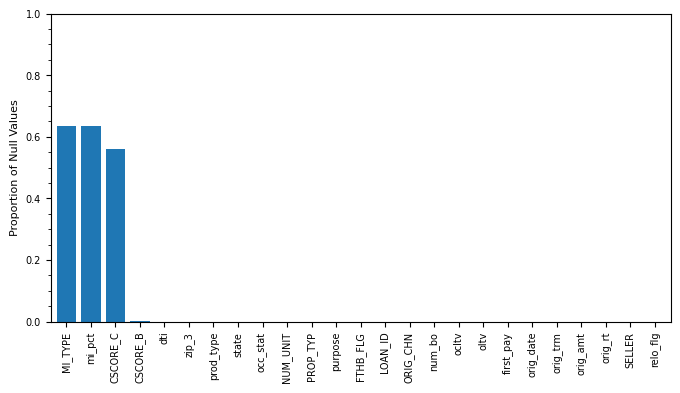

In [12]:
ax = df.isnull().sum().divide(len(df)).sort_values(ascending=False).plot.bar(width=0.8, figsize=(8, 4), fontsize=7)

ax.set_ylim(0, 1)

ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.set_tick_params(which='minor', bottom=True)

ax.set_ylabel('Proportion of Null Values', fontsize=8)

In [13]:
print(f"""
    Number rows: {df.shape[0]}
    Number columns: {df.shape[1]}
    Number null columns: {((df.isnull().sum()/len(df)) == 1).sum()}
""")


    Number rows: 188502
    Number columns: 25
    Number null columns: 0



In [14]:
# Refer to the Single-Family Loan Performance Dataset and Credit Risk Transfer - Glossary and File Layout
df.columns
print(df)

             LOAN_ID ORIG_CHN                          SELLER  orig_rt  \
0       000137581448        R                           Other    6.990   
1       000137581449        R          Pulte Mortgage, L.L.C.    5.990   
2       000137581450        B               CMG Mortgage, Inc    6.250   
3       000137581451        C              CitiMortgage, Inc.    7.375   
4       000137581452        R                           Other    6.500   
...              ...      ...                             ...      ...   
188497  000138004118        B  United Wholesale Mortgage, LLC    6.625   
188498  000138004119        R                           Other    6.125   
188499  000138004120        R                           Other    6.750   
188500  000138004121        C                      NewRez LLC    7.490   
188501  000138004122        B            Rocket Mortgage, LLC    6.750   

        orig_amt  orig_trm  orig_date            first_pay  oltv  ocltv  ...  \
0       450000.0       360 2024

# Using Classes for OOP

In [15]:
class Loan:
    def __init__(self, LOAN_ID, ORIG_CHN, SELLER, orig_rt, orig_amt, orig_trm,
                 orig_date, first_pay, oltv, ocltv, num_bo, dti, CSCORE_B,
                 CSCORE_C, FTHB_FLG, purpose, PROP_TYP, NUM_UNIT, occ_stat,
                 state, zip_3, mi_pct, prod_type, MI_TYPE, relo_flg):
        self.LOAN_ID = LOAN_ID
        self.ORIG_CHN = ORIG_CHN
        self.SELLER = SELLER
        self.orig_rt = orig_rt
        self.orig_amt = orig_amt
        self.orig_trm = orig_trm
        self.orig_date = orig_date
        self.first_pay = first_pay
        self.oltv = oltv
        self.ocltv = ocltv
        self.num_bo = num_bo
        self.dti = dti
        self.CSCORE_B = CSCORE_B
        self.CSCORE_C = CSCORE_C
        self.FTHB_FLG = FTHB_FLG
        self.purpose = purpose
        self.PROP_TYP = PROP_TYP
        self.NUM_UNIT = NUM_UNIT
        self.occ_stat = occ_stat
        self.state = state
        self.zip_3 = zip_3
        self.mi_pct = mi_pct
        self.prod_type = prod_type
        self.MI_TYPE = MI_TYPE
        self.relo_flg = relo_flg

class Facility:
    def __init__(self, facility_id):
        self.facility_id = facility_id
        self.asset_covenants = []
        self.pool_covenants = []
        self.existing_loans = []

    def add_asset_covenants(self, asset_covenant):
        self.asset_covenants.append(asset_covenant)
    def add_pool_covenants(self, pool_covenant):
        self.pool_covenants.append(pool_covenant)
    def add_existing_loans(self, existing_loans):
        self.existing_loans.extend(existing_loans)
    def asset_check(self, new_loan):
        return all(asset_covenant.asset_check(new_loan) for asset_covenant in self.asset_covenants) # checks all Asset Covenants

class AssetCovenant:
    def __init__(self, constr_prop, constr_op, constr_val, crit_prop, crit_op, crit_val):
        self.constr_prop = constr_prop
        self.constr_op = constr_op
        self.constr_val = constr_val
        self.crit_prop = crit_prop
        self.crit_op = crit_op
        self.crit_val = crit_val
    def asset_check(self, new_loan):
        if all(self._helper(getattr(new_loan, prop), op, val) for prop, op, val in zip(self.crit_prop,self.crit_op,self.crit_val)):
          return self._helper(getattr(new_loan, self.constr_prop),self.constr_op,self.constr_val)
        else:
          return True

    def _helper(_,prop,op,val):
      if op == '==':
          return prop == val
      elif op == '==':
          return prop != val
      elif op == '<=':
          return prop <= val
      elif op == '>=':
          return prop >= val
      else:
        return False

class PoolCovenant:
    def __init__(self, a, b, c, constr_type, constr_op):
      self.a = a
      self.b = b
      self.c = c
      self.constr_type = constr_type
      self.constr_op = constr_op
      self.a_e = []
      self.b_e = []

    def update_params(self,a_new,b_new):
      self.a_e.extend(a_new)
      self.b_e.extend(b_new)

# Input of Loans and Facilities - Manually Change

In [16]:
# Selecting 'n' random assets to be assigned
n = 200
df_filtered = df.sample(n)

random_df = df_filtered.iloc[len(df_filtered) // 2:]
random_df_prealloc = df_filtered.iloc[:len(df_filtered) // 2]
random_df_prealloc = random_df_prealloc[(random_df_prealloc['oltv'] <= 90) &
                                        (random_df_prealloc['CSCORE_B'] >= 600) &
                                        (random_df_prealloc['orig_rt'] >= 6)]

random_df_prealloc_f1 = random_df_prealloc[:len(random_df_prealloc)//2]
random_df_prealloc_f2 = random_df_prealloc[len(random_df_prealloc)//2:]


loans_to_assign = [Loan(**random_df.iloc[row]) for row in range(len(random_df))]
loans_assigned = [Loan(**random_df_prealloc.iloc[row]) for row in range(len(random_df_prealloc))]
loans_assigned_f1 = [Loan(**random_df_prealloc_f1.iloc[row]) for row in range(len(random_df_prealloc_f1))]
loans_assigned_f2 = [Loan(**random_df_prealloc_f2.iloc[row]) for row in range(len(random_df_prealloc_f2))]


#print(loans_to_asssign[0].LOAN_ID)
#print(len(random_df_prealloc))
#df_filtered

df[df['LOAN_ID'].isin([loan.LOAN_ID for loan in loans_assigned])]
df[df['LOAN_ID'].isin([loan.LOAN_ID for loan in loans_to_assign])]

print(sum(loan.orig_amt for loan in loans_assigned))
print(sum(loan.orig_amt for loan in loans_to_assign))

print(sum(random_df_prealloc_f1['orig_amt']))
print(sum(random_df_prealloc_f2['orig_amt']))

23017000.0
35291000.0
11422000.0
11595000.0


In [ ]:
# Creating Facillities

facility1 = Facility(facility_id=0)

facility1.add_asset_covenants(AssetCovenant(constr_prop='orig_rt',
                                            constr_op='>=',
                                            constr_val=6,
                                            crit_prop=[],
                                            crit_op=[],
                                            crit_val=[]))

facility1.add_pool_covenants(PoolCovenant(a=random_df['CSCORE_B'].to_list(),
                                          b=((random_df['state']=='CA')*(random_df['orig_amt'])).to_list(),
                                          c=600,
                                          constr_type = 0,# 0 for first type, 1 for second type
                                          constr_op = 1)) # 0 if less or equal to, 1 if greater than or equal to

facility1.add_pool_covenants(PoolCovenant(a=[1]*len(random_df),
                                          b=random_df['orig_amt'].to_list(),
                                          c=15e6,
                                          constr_type = 1,
                                          constr_op = 0))

facility1.add_existing_loans(existing_loans=loans_assigned_f1)

facility1.pool_covenants[0].update_params(a_new=random_df_prealloc_f1['CSCORE_B'].to_list(),
                                          b_new=(random_df_prealloc_f1['state']=='CA')*(random_df_prealloc_f1['orig_amt']).to_list())

facility1.pool_covenants[1].update_params([1]*len(random_df_prealloc_f1),
                                          random_df_prealloc_f1['orig_amt'].to_list())

facility2 = Facility(facility_id=1)

facility2.add_asset_covenants(AssetCovenant(constr_prop='orig_rt',
                                            constr_op='>=',
                                            constr_val=5,
                                            crit_prop=[],
                                            crit_op=[],
                                            crit_val=[]))

facility2.add_pool_covenants(PoolCovenant(a=random_df['oltv'].to_list(),
                                          b=[1]*len(random_df),
                                          c=90,
                                          constr_type = 0,
                                          constr_op = 0))

facility2.add_pool_covenants(PoolCovenant(a=[1]*len(random_df),
                                          b=random_df['orig_amt'].to_list(),
                                          c=15e6,
                                          constr_type = 1,
                                          constr_op = 0))

facility2.add_existing_loans(existing_loans=loans_assigned_f1)

facility2.pool_covenants[0].update_params(a_new=random_df_prealloc_f2['oltv'].to_list(),
                                          b_new=[1]*len(random_df_prealloc_f2))

facility2.pool_covenants[1].update_params(a_new=[1]*len(random_df_prealloc_f2),
                                          b_new=random_df_prealloc_f2['orig_amt'].to_list())

In [18]:
# Iterate through all loans and facilities to check if they can be accepted or not
facilities = [facility1, facility2]

# Matrix of dim loans x facilities that have a 0 when a loan is rejected, 1 when a loan is accepted by a facility
asset_acc_matrix = np.zeros((len(loans_to_assign), len(facilities)))


for i, loan in enumerate(loans_to_assign):
    print(f"For loan {loan.LOAN_ID}:")
    for j, facility in enumerate(facilities):
        #existing_loans = pd.DataFrame([loan.__dict__ for loan in facility.existing_loans])
        if facility.asset_check(loan):
            print(f"  - Loan is accepted by Facility {facility.facility_id}")
            asset_acc_matrix[i][j] = 1
        else:
            print(f"  - Loan is rejected by Facility {facility.facility_id}")

#print(asset_acc_matrix)

For loan 000137610308:
  - Loan is accepted by Facility 0
  - Loan is accepted by Facility 1
For loan 000137972294:
  - Loan is rejected by Facility 0
  - Loan is accepted by Facility 1
For loan 000137603507:
  - Loan is accepted by Facility 0
  - Loan is accepted by Facility 1
For loan 000137790595:
  - Loan is accepted by Facility 0
  - Loan is accepted by Facility 1
For loan 000137611197:
  - Loan is accepted by Facility 0
  - Loan is accepted by Facility 1
For loan 000137758373:
  - Loan is accepted by Facility 0
  - Loan is accepted by Facility 1
For loan 000137769810:
  - Loan is rejected by Facility 0
  - Loan is accepted by Facility 1
For loan 000137941137:
  - Loan is accepted by Facility 0
  - Loan is accepted by Facility 1
For loan 000137611413:
  - Loan is accepted by Facility 0
  - Loan is accepted by Facility 1
For loan 000137583124:
  - Loan is accepted by Facility 0
  - Loan is accepted by Facility 1
For loan 000137795733:
  - Loan is accepted by Facility 0
  - Loan is 

In [ ]:
# pip install gurobipy

Note: you may need to restart the kernel to use updated packages.


In [20]:
from gurobipy import Model, GRB, quicksum

In [21]:
num_loans = len(loans_to_assign)
num_facilities = len(facilities)

# Setting up the model
model = Model("Loan_Assignments")
x = model.addVars(num_loans, num_facilities, vtype=GRB.BINARY, name="x")
model.setObjective(
    quicksum(loans_to_assign[i].orig_amt * x[i, j] for i in range(num_loans) for j in range(num_facilities)),
    GRB.MAXIMIZE
)

# Add constraints for one loan per facility
for i in range(num_loans):
  model.addConstr(quicksum(x[i, j] for j in range(num_facilities)) <= 1, f"OneFacilityPerLoan_{i}")

# Add constraints for loan-facility compatibility
for i in range(num_loans):
    for j in range(num_facilities):
        model.addConstr(x[i, j] <= asset_acc_matrix[i][j],f"LoanCompatibility_{i}_{j}")

#Add constraints for pool covenants
for facility in facilities:
    j = facility.facility_id

    for pool_covenant in facility.pool_covenants:
      a = pool_covenant.a
      b = pool_covenant.b
      c = pool_covenant.c
      constr_op = pool_covenant.constr_op
      constr_type = pool_covenant.constr_type
      a_e = pool_covenant.a_e
      b_e = pool_covenant.b_e

      flip_ineq = 1 - 2*constr_op # will be -1 if geq, 1 o/w
      if constr_type:
        model.addConstr((quicksum(x[i, j]*a[i]*b[i] for i in range(len(b)))
                        +quicksum(a_e[i]*b_e[i] for i in range(len(b_e))))*flip_ineq <= c*flip_ineq)
      else:
        model.addConstr(quicksum(x[i, j]*(a[i]-c)*b[i] for i in range(len(b)))*flip_ineq <=
                        quicksum((c-a_e[i])*b_e[i] for i in range(len(b_e))) *flip_ineq)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-03


In [22]:
# Optimize model
model.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11+.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 304 rows, 200 columns and 700 nonzeros
Model fingerprint: 0x6b746f71
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+08]
  Objective range  [6e+04, 8e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+08]
Found heuristic solution: objective 6909000.0000
Presolve removed 213 rows and 11 columns
Presolve time: 0.02s
Presolved: 91 rows, 189 columns, 367 nonzeros
Variable types: 0 continuous, 189 integer (189 binary)
Found heuristic solution: objective 6982000.0000

Root relaxation: objective 6.983000e+06, 81 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  O

In [23]:
model.display()

Maximize
224000.0 x[0,0] + 224000.0 x[0,1] + 269000.0 x[1,0] + 269000.0 x[1,1]
+ 515000.0 x[2,0] + 515000.0 x[2,1] + 239000.0 x[3,0] + 239000.0 x[3,1]
+ 265000.0 x[4,0] + 265000.0 x[4,1] + 307000.0 x[5,0] + 307000.0 x[5,1]
+ 217000.0 x[6,0] + 217000.0 x[6,1] + 350000.0 x[7,0] + 350000.0 x[7,1]
+ 602000.0 x[8,0] + 602000.0 x[8,1] + 269000.0 x[9,0] + 269000.0 x[9,1]
+ 383000.0 x[10,0] + 383000.0 x[10,1] + 323000.0 x[11,0] + 323000.0 x[11,1]
+ 241000.0 x[12,0] + 241000.0 x[12,1] + 205000.0 x[13,0] + 205000.0 x[13,1]
+ 131000.0 x[14,0] + 131000.0 x[14,1] + 536000.0 x[15,0] + 536000.0 x[15,1]
+ 201000.0 x[16,0] + 201000.0 x[16,1] + 233000.0 x[17,0] + 233000.0 x[17,1]
+ 647000.0 x[18,0] + 647000.0 x[18,1] + 124000.0 x[19,0] + 124000.0 x[19,1]
+ 568000.0 x[20,0] + 568000.0 x[20,1] + 780000.0 x[21,0] + 780000.0 x[21,1]
+ 588000.0 x[22,0] + 588000.0 x[22,1] + 318000.0 x[23,0] + 318000.0 x[23,1]
+ 132000.0 x[24,0] + 132000.0 x[24,1] + 521000.0 x[25,0] + 521000.0 x[25,1]
+ 580000.0 x[26,0] + 5800

C:\Users\inhou\AppData\Local\Temp\ipykernel_14084\259237463.py:1: DeprecationWarning: Model.display() is deprecated
  model.display()


  OneFacilityPerLoan_49: x[49,0] + x[49,1] <= 1
  OneFacilityPerLoan_50: x[50,0] + x[50,1] <= 1
  OneFacilityPerLoan_51: x[51,0] + x[51,1] <= 1
  OneFacilityPerLoan_52: x[52,0] + x[52,1] <= 1
  OneFacilityPerLoan_53: x[53,0] + x[53,1] <= 1
  OneFacilityPerLoan_54: x[54,0] + x[54,1] <= 1
  OneFacilityPerLoan_55: x[55,0] + x[55,1] <= 1
  OneFacilityPerLoan_56: x[56,0] + x[56,1] <= 1
  OneFacilityPerLoan_57: x[57,0] + x[57,1] <= 1
  OneFacilityPerLoan_58: x[58,0] + x[58,1] <= 1
  OneFacilityPerLoan_59: x[59,0] + x[59,1] <= 1
  OneFacilityPerLoan_60: x[60,0] + x[60,1] <= 1
  OneFacilityPerLoan_61: x[61,0] + x[61,1] <= 1
  OneFacilityPerLoan_62: x[62,0] + x[62,1] <= 1
  OneFacilityPerLoan_63: x[63,0] + x[63,1] <= 1
  OneFacilityPerLoan_64: x[64,0] + x[64,1] <= 1
  OneFacilityPerLoan_65: x[65,0] + x[65,1] <= 1
  OneFacilityPerLoan_66: x[66,0] + x[66,1] <= 1
  OneFacilityPerLoan_67: x[67,0] + x[67,1] <= 1
  OneFacilityPerLoan_68: x[68,0] + x[68,1] <= 1
  OneFacilityPerLoan_69: x[69,0] + x[69,

In [24]:
if model.status == GRB.OPTIMAL:
    print(f'Total funded: {model.ObjVal}')
    for j in range(num_facilities):
        print(f'Loans take by facility {j}:')
        for i in range(num_loans):
          if x[i, j].X > 0:
            print(loans_to_assign[i].LOAN_ID)
    print(f'Loans not taken:')
    for i in range(num_loans):
      if all(x[i, j].X == 0 for j in range(num_facilities)):
        print(loans_to_assign[i].LOAN_ID)
else:
    print("No solution found")

Total funded: 6983000.0
Loans take by facility 0:
000137610308
000137790595
000137941137
000137795733
000137612620
000137754202
000137748348
000137975481
000137964868
000137581890
Loans take by facility 1:
000137972294
000137583972
000137800139
000137760529
000137982139
000137600393
000137792415
000137943388
000137989323
000137619052
000137586963
Loans not taken:
000137603507
000137611197
000137758373
000137769810
000137611413
000137583124
000137988460
000137760185
000138002774
000137743806
000137599462
000137997285
000137986944
000137611562
000137983476
000137985356
000138003826
000137944984
000137620047
000137966992
000137788124
000137629195
000137965077
000137771935
000137745811
000137998711
000137593289
000137767878
000137791416
000137623544
000137999584
000137751696
000137995183
000137602511
000137800469
000137594434
000137621799
000137955697
000137597241
000137599344
000137997081
000137957738
000137784223
000137953257
000138001384
000137626199
000137627184
000137957464
0001379573

In [27]:
num_loans = len(loans_to_assign)
num_facilities = len(facilities)

# Setting up the model
model2 = Model("Loan_Assignments")
y = model2.addVars(num_loans, num_facilities, vtype=GRB.BINARY, name="x")
model2.setObjective(
    quicksum(loans_to_assign[i].CSCORE_B * y[i, j] for i in range(num_loans) for j in range(num_facilities)),
    GRB.MAXIMIZE
)

#Add Optimality constraint
tol =1e4
model2.addConstr(quicksum(loans_to_assign[i].orig_amt * y[i, j] for i in range(num_loans) for j in range(num_facilities))
                  >= model.ObjVal - tol)

# Add constraints for one loan per facility
for i in range(num_loans):
  model2.addConstr(quicksum(y[i, j] for j in range(num_facilities)) <= 1, f"OneFacilityPerLoan_{i}")

# Add constraints for loan-facility compatibility
for i in range(num_loans):
    for j in range(num_facilities):
        model2.addConstr(y[i, j] <= asset_acc_matrix[i][j],f"LoanCompatibility_{i}_{j}")

#Add constraints for pool covenants
for facility in facilities:
    j = facility.facility_id

    for pool_covenant in facility.pool_covenants:
      a = pool_covenant.a
      b = pool_covenant.b
      c = pool_covenant.c
      constr_op = pool_covenant.constr_op
      constr_type = pool_covenant.constr_type
      a_e = pool_covenant.a_e
      b_e = pool_covenant.b_e

      flip_ineq = 1 - 2*constr_op # will be -1 if geq, 1 o/w
      if constr_type:
        model2.addConstr((quicksum(y[i, j]*a[i]*b[i] for i in range(len(b)))
                        +quicksum(a_e[i]*b_e[i] for i in range(len(b_e))))*flip_ineq <= c*flip_ineq)
      else:
        model2.addConstr(quicksum(y[i, j]*(a[i]-c)*b[i] for i in range(len(b)))*flip_ineq <=
                        quicksum((c-a_e[i])*b_e[i] for i in range(len(b_e))) *flip_ineq)

In [28]:
model2.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11+.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 305 rows, 200 columns and 900 nonzeros
Model fingerprint: 0x6ba83d87
Variable types: 0 continuous, 200 integer (200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+08]
  Objective range  [6e+02, 8e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+08]
Presolve removed 213 rows and 11 columns
Presolve time: 0.00s
Presolved: 92 rows, 189 columns, 556 nonzeros
Variable types: 0 continuous, 189 integer (189 binary)
Found heuristic solution: objective 8357.0000000

Root relaxation: objective 2.981814e+04, 92 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It

In [29]:
model2.display()

Maximize
796.0 x[0,0] + 796.0 x[0,1] + 787.0 x[1,0] + 787.0 x[1,1] + 777.0 x[2,0]
+ 777.0 x[2,1] + 692.0 x[3,0] + 692.0 x[3,1] + 808.0 x[4,0] + 808.0 x[4,1]
+ 727.0 x[5,0] + 727.0 x[5,1] + 809.0 x[6,0] + 809.0 x[6,1] + 788.0 x[7,0]
+ 788.0 x[7,1] + 719.0 x[8,0] + 719.0 x[8,1] + 730.0 x[9,0] + 730.0 x[9,1]
+ 692.0 x[10,0] + 692.0 x[10,1] + 656.0 x[11,0] + 656.0 x[11,1] + 719.0 x[12,0]
+ 719.0 x[12,1] + 777.0 x[13,0] + 777.0 x[13,1] + 710.0 x[14,0] + 710.0 x[14,1]
+ 779.0 x[15,0] + 779.0 x[15,1] + 720.0 x[16,0] + 720.0 x[16,1] + 790.0 x[17,0]
+ 790.0 x[17,1] + 791.0 x[18,0] + 791.0 x[18,1] + 729.0 x[19,0] + 729.0 x[19,1]
+ 820.0 x[20,0] + 820.0 x[20,1] + 772.0 x[21,0] + 772.0 x[21,1] + 761.0 x[22,0]
+ 761.0 x[22,1] + 712.0 x[23,0] + 712.0 x[23,1] + 738.0 x[24,0] + 738.0 x[24,1]
+ 719.0 x[25,0] + 719.0 x[25,1] + 782.0 x[26,0] + 782.0 x[26,1] + 764.0 x[27,0]
+ 764.0 x[27,1] + 779.0 x[28,0] + 779.0 x[28,1] + 752.0 x[29,0] + 752.0 x[29,1]
+ 721.0 x[30,0] + 721.0 x[30,1] + 801.0 x[31,0] + 801

C:\Users\inhou\AppData\Local\Temp\ipykernel_14084\4239895284.py:1: DeprecationWarning: Model.display() is deprecated
  model2.display()


  OneFacilityPerLoan_33: x[33,0] + x[33,1] <= 1
  OneFacilityPerLoan_34: x[34,0] + x[34,1] <= 1
  OneFacilityPerLoan_35: x[35,0] + x[35,1] <= 1
  OneFacilityPerLoan_36: x[36,0] + x[36,1] <= 1
  OneFacilityPerLoan_37: x[37,0] + x[37,1] <= 1
  OneFacilityPerLoan_38: x[38,0] + x[38,1] <= 1
  OneFacilityPerLoan_39: x[39,0] + x[39,1] <= 1
  OneFacilityPerLoan_40: x[40,0] + x[40,1] <= 1
  OneFacilityPerLoan_41: x[41,0] + x[41,1] <= 1
  OneFacilityPerLoan_42: x[42,0] + x[42,1] <= 1
  OneFacilityPerLoan_43: x[43,0] + x[43,1] <= 1
  OneFacilityPerLoan_44: x[44,0] + x[44,1] <= 1
  OneFacilityPerLoan_45: x[45,0] + x[45,1] <= 1
  OneFacilityPerLoan_46: x[46,0] + x[46,1] <= 1
  OneFacilityPerLoan_47: x[47,0] + x[47,1] <= 1
  OneFacilityPerLoan_48: x[48,0] + x[48,1] <= 1
  OneFacilityPerLoan_49: x[49,0] + x[49,1] <= 1
  OneFacilityPerLoan_50: x[50,0] + x[50,1] <= 1
  OneFacilityPerLoan_51: x[51,0] + x[51,1] <= 1
  OneFacilityPerLoan_52: x[52,0] + x[52,1] <= 1
  OneFacilityPerLoan_53: x[53,0] + x[53,

In [31]:
if model2.status == GRB.OPTIMAL:
    print(f'Total funded: {quicksum(loans_to_assign[i].orig_amt * y[i, j].X for i in range(num_loans) for j in range(num_facilities))}')
    print(f'Average borrower credit score: {model.ObjVal}')
    for j in range(num_facilities):
        print(f'Loans taken by facility {j}:')
        for i in range(num_loans):
          if y[i, j].X > 0:
            print(loans_to_assign[i].LOAN_ID)
    print(f'Loans not taken:')
    for i in range(num_loans):
      if all(y[i, j].X == 0 for j in range(num_facilities)):
        print(loans_to_assign[i].LOAN_ID)
else:
    print("No solution found")

Total funded: 6979000.0
Average borrower credit score: 6983000.0
Loans taken by facility 0:
000137611197
000137760185
000137760529
000138002774
000137943388
000137620047
000137966992
000137771935
000137593289
000137767878
000137599344
000137626199
000137613579
000137954533
000137981319
000137626691
000137586963
000137622830
000137764550
000137796194
000137995281
000137594893
Loans taken by facility 1:
000137610308
000137769810
000137988460
000137982139
000137611562
000137989323
000138003826
000137944984
000137800469
000137619052
000137784223
000137627184
000137957353
000137798783
000137748377
000137961064
000137599297
Loans not taken:
000137972294
000137603507
000137790595
000137758373
000137941137
000137611413
000137583124
000137795733
000137612620
000137583972
000137800139
000137600393
000137743806
000137599462
000137792415
000137997285
000137754202
000137986944
000137748348
000137983476
000137975481
000137985356
000137788124
000137629195
000137965077
000137745811
000137998711
000137